In [5]:
import numpy as np 
import struct
from array import array
from os.path  import join
import random

class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)    

In [8]:
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


In [6]:
input_path = './data/mnist'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

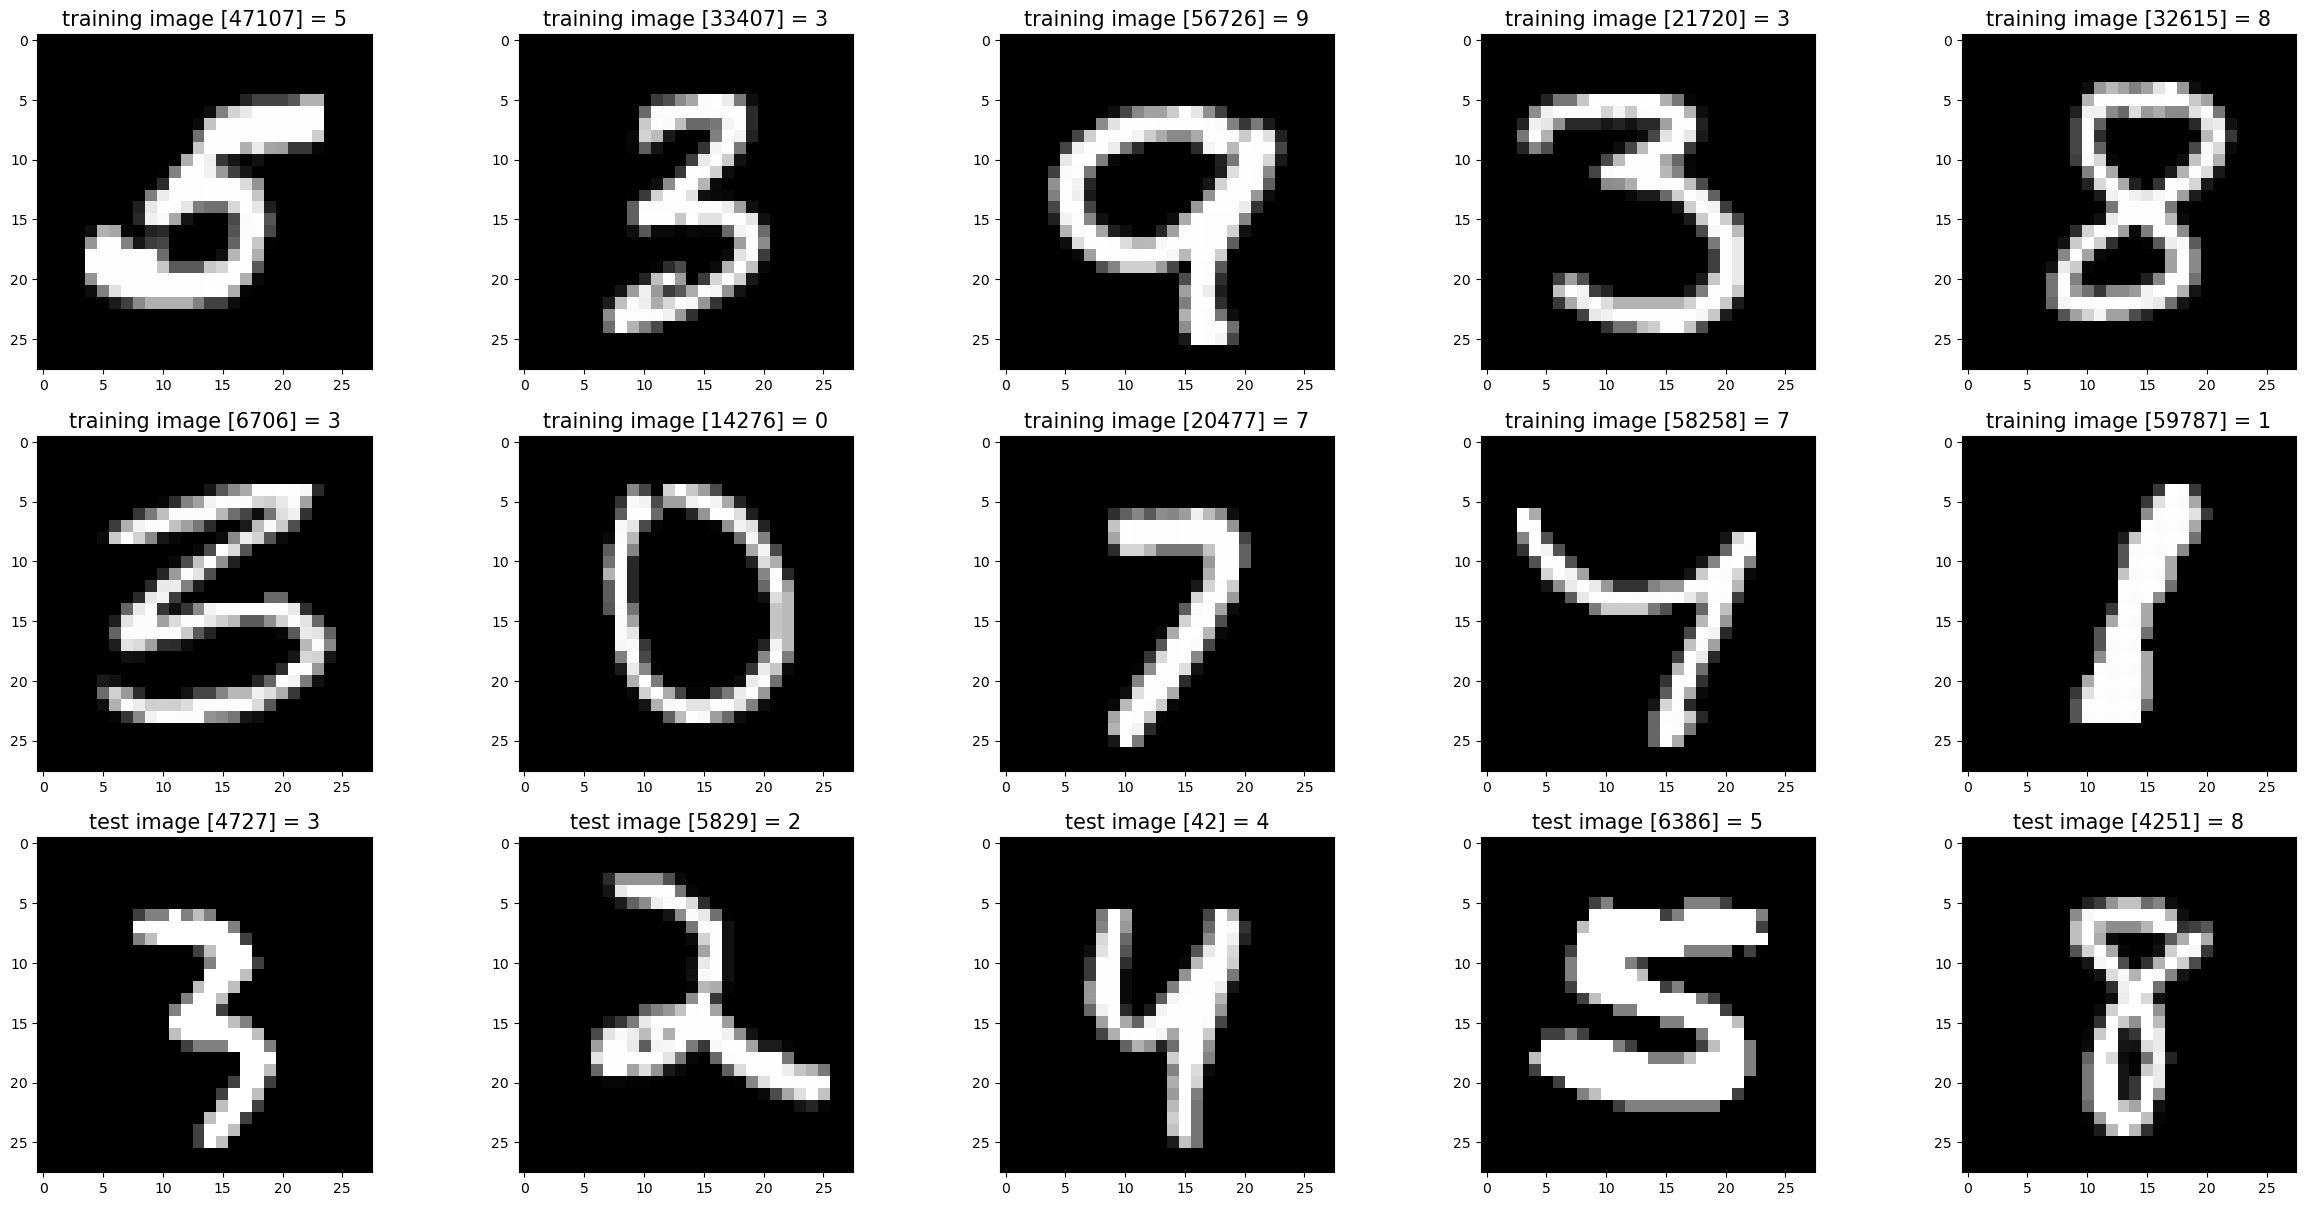

In [9]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

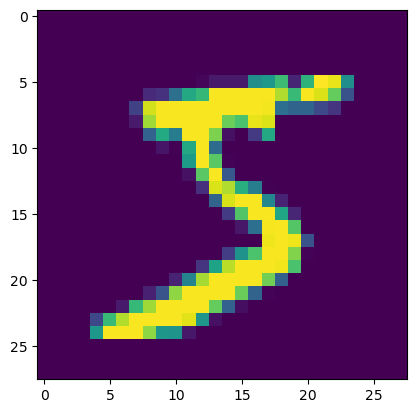

In [12]:
plt.imshow(x_train[0])

In [13]:
y_train[0]

5

In [14]:
## Part one: implement the neural network
## - Weights 
## - Biases 


In [51]:
raw_input = np.array(x_train[0])

In [89]:
np.random.uniform(-1, 1, (768, 128))

array([[-0.59181227,  0.66663832, -0.24086643, ..., -0.93859633,
        -0.61931318,  0.64034623],
       [-0.86023951,  0.37939771, -0.2314802 , ..., -0.80563357,
         0.69032755,  0.83858066],
       [-0.60585031,  0.89801806,  0.66042021, ..., -0.61960439,
         0.79010826, -0.03208581],
       ...,
       [-0.09685697,  0.55726238,  0.45873488, ...,  0.97690958,
        -0.84385164,  0.81408419],
       [-0.52237848,  0.06841668, -0.82683636, ...,  0.98633641,
        -0.20721273, -0.49872414],
       [-0.75762281, -0.19262391, -0.73658389, ..., -0.86745782,
         0.7382155 , -0.96647067]])

In [52]:
## 768 -> 128 -> 64 -> 10

In [112]:
w0 = np.random.uniform(-1, 1, (784, 128))
w1 = np.random.uniform(-1, 1, (128, 64))
w2 = np.random.uniform(-1, 1, (64, 10))

b0 = np.random.uniform(-1, 1, (1, 128)) 
b1 = np.random.uniform(-1, 1, (1, 64))
b2 = np.random.uniform(-1, 1, (1, 10))

W = [w0, w1, w2]
B = [b0, b1, b2]

In [145]:
def sigmoid(array):
    return 1.0 / (1.0 + np.exp(-array))


In [146]:
def d_sigmoid(array):
    return sigmoid(array) * (1 - sigmoid(array))


In [123]:
def forward_pass(X, W, B):
    flattened_input = np.array([np.concatenate(X)])
    a1 = sigmoid(np.matmul(flattened_input, W[0]) + B[0])
    a2 = sigmoid(np.matmul(a1, W[1]) + B[1])
    output = sigmoid(np.matmul(a2, W[2]) + B[2])
    return output / np.sum(output)


In [133]:
def one_hot_encoding(number, num_numbers=10):
    return_array = np.zeros(num_numbers)
    return_array[number]=1
    return return_array

In [ ]:
forward_pass(raw_input, W, B)

/var/folders/6b/s0bt94nd6lgf0by73z0frhb00000gn/T/ipykernel_66392/874154748.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-array))


array([[0.06697299, 0.11459765, 0.00070825, 0.17606032, 0.05348746,
        0.17241426, 0.04792088, 0.16229322, 0.07342782, 0.13211716]])

In [125]:
## Implement the backpropagation algorithm

In [26]:
## Compute the gradient of the cost function
def calculate_gradient(W, B, X, y, alpha=1e-4):
    prediction = forward_pass(raw_input, W, B)
    ## Use the chain rule to compute the gradient

    ## calculate this another time.. maby use ReLU to make the derivation simpler
    


In [152]:
def cost(y_pred, y_actual):
    return np.sum(np.power(y_pred - y_actual, 2))

In [157]:
X = raw_input
y = y_train[0]
flattened_input = np.array([np.concatenate(X)])
z1 = np.matmul(flattened_input, W[0]) + B[0]
a1 = sigmoid(z1)
z2 = np.matmul(a1, W[1]) + B[1]
a2 = sigmoid(z2)
z_output = np.matmul(a2, W[2]) + B[2]
output = sigmoid(z_output)

c = cost(output, one_hot_encoding(y))
print(f"Cost: {c}")

Cost: 3.12661398131741


/var/folders/6b/s0bt94nd6lgf0by73z0frhb00000gn/T/ipykernel_66392/874154748.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-array))


In [159]:
output

array([[0.36891787, 0.63125629, 0.00390138, 0.96982078, 0.29463342,
        0.9497366 , 0.26397012, 0.89398528, 0.404474  , 0.72776173]])

In [174]:
(2*(output - one_hot_encoding(y))).T.shape

(10, 1)

In [171]:
d_sigmoid(z2).shape

(1, 64)

In [202]:
np.matmul(np.matmul(2*(output - one_hot_encoding(y)).T, d_sigmoid(z2)), a2.T).shape

(10, 1)

In [206]:
np.matmul(2*(output - one_hot_encoding(y)).T, d_sigmoid(z2)).shape

(10, 64)

In [207]:
 a2.T.shape

(64, 1)

In [190]:
a2.shape

(1, 64)

In [ ]:
## Desired shape:

In [187]:
W[2].shape

(64, 10)

In [ ]:
2*()

In [27]:
np.matmul(X, W)

array([[1.08094083, 2.10772461],
       [0.59070082, 1.69025698]])